
# Batch normalisation layers

In [4]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [6]:
# load the dataset
from sklearn.datasets import load_diabetes

data = load_diabetes()
data, targets = data['data'], data['target']
data.shape, targets.shape

((442, 10), (442,))

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [9]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2)

train_data.shape, test_data.shape, train_targets.shape, test_targets.shape

((353, 10), (89, 10), (353,), (89,))

In [18]:
model.fit(train_data, train_targets, validation_split=0.15,batch_size=128, epochs=1000, verbose=2)

Epoch 1/1000
3/3 - 0s - loss: 7060.5200 - mae: 77.0895 - val_loss: 16182.8145 - val_mae: 118.1475
Epoch 2/1000
3/3 - 0s - loss: 6938.7441 - mae: 76.1302 - val_loss: 15871.9756 - val_mae: 116.6905
Epoch 3/1000
3/3 - 0s - loss: 7036.7456 - mae: 76.2334 - val_loss: 15514.1309 - val_mae: 114.8014
Epoch 4/1000
3/3 - 0s - loss: 6897.9390 - mae: 75.3031 - val_loss: 14877.1523 - val_mae: 111.5590
Epoch 5/1000
3/3 - 0s - loss: 6733.0591 - mae: 74.0349 - val_loss: 14501.8291 - val_mae: 109.4029
Epoch 6/1000
3/3 - 0s - loss: 6450.9102 - mae: 73.0581 - val_loss: 13985.7607 - val_mae: 107.0863
Epoch 7/1000
3/3 - 0s - loss: 6639.0474 - mae: 73.4018 - val_loss: 13469.5869 - val_mae: 105.0732
Epoch 8/1000
3/3 - 0s - loss: 6390.7451 - mae: 72.3124 - val_loss: 13333.5674 - val_mae: 104.5257
Epoch 9/1000
3/3 - 0s - loss: 6432.9673 - mae: 72.4126 - val_loss: 13125.5361 - val_mae: 103.5644
Epoch 10/1000
3/3 - 0s - loss: 6113.9985 - mae: 71.4307 - val_loss: 12891.8340 - val_mae: 102.6600
Epoch 11/1000
3/3 -

In [19]:
history = model.history.history

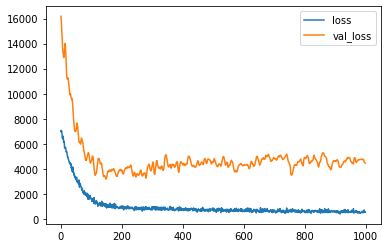

In [20]:
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

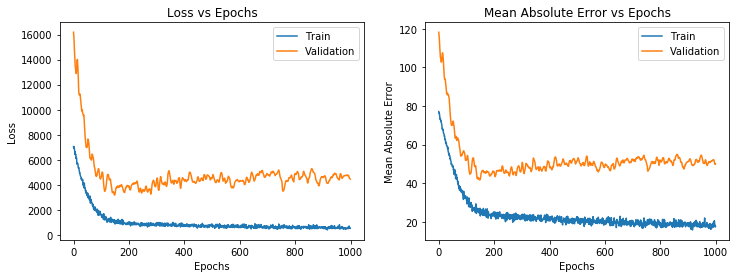

In [21]:
import pandas as pd
import numpy as np


frame = pd.DataFrame(history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()


In [23]:
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 67,585
Trainable params: 67,585
Non-trainable params: 0
__________________________________________________

In [24]:
model_2.compile(optimizer='adam', loss='mse', metrics='mae')

In [25]:
model_2.fit(train_data, train_targets, validation_split=0.15,batch_size=128, epochs=1000, verbose=2)

Epoch 1/1000
3/3 - 1s - loss: 27916.8379 - mae: 148.4901 - val_loss: 35991.1992 - val_mae: 173.1532
Epoch 2/1000
3/3 - 0s - loss: 27892.7148 - mae: 148.4084 - val_loss: 35948.8750 - val_mae: 173.0316
Epoch 3/1000
3/3 - 0s - loss: 27851.6641 - mae: 148.2674 - val_loss: 35873.6211 - val_mae: 172.8151
Epoch 4/1000
3/3 - 0s - loss: 27774.8691 - mae: 148.0146 - val_loss: 35740.0625 - val_mae: 172.4303
Epoch 5/1000
3/3 - 0s - loss: 27646.0605 - mae: 147.5705 - val_loss: 35502.8281 - val_mae: 171.7456
Epoch 6/1000
3/3 - 0s - loss: 27412.1270 - mae: 146.7775 - val_loss: 35081.7070 - val_mae: 170.5248
Epoch 7/1000
3/3 - 0s - loss: 26996.3223 - mae: 145.3703 - val_loss: 34345.6758 - val_mae: 168.3716
Epoch 8/1000
3/3 - 0s - loss: 26300.2793 - mae: 142.9130 - val_loss: 33086.4258 - val_mae: 164.6286
Epoch 9/1000
3/3 - 0s - loss: 25071.5508 - mae: 138.6732 - val_loss: 30999.6406 - val_mae: 158.2433
Epoch 10/1000
3/3 - 0s - loss: 23097.3730 - mae: 131.4646 - val_loss: 27689.9590 - val_mae: 147.5758

In [26]:
history = model_2.history.history

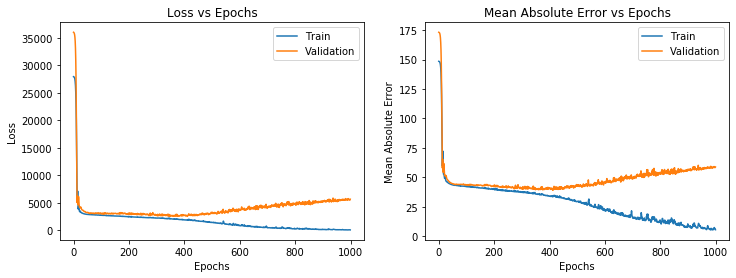

In [27]:
frame = pd.DataFrame(history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

In [28]:
model.evaluate(test_data, test_targets)

3/3 [==============================] - 0s 4ms/step - loss: 4781.7456 - mae: 53.5934


[4781.74560546875, 53.593387603759766]

In [29]:
model_2.evaluate(test_data, test_targets)

3/3 [==============================] - 0s 8ms/step - loss: 8180.9106 - mae: 67.0893


[8180.91064453125, 67.08930969238281]

In [30]:
model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

In [31]:
model_3.compile(optimizer='adam', loss='mse', metrics='mae')

In [32]:
model_3.fit(train_data, train_targets, validation_split=0.15,batch_size=128, epochs=1000, verbose=2)

Epoch 1/1000
3/3 - 1s - loss: 27916.7754 - mae: 148.4890 - val_loss: 35991.8711 - val_mae: 173.1552
Epoch 2/1000
3/3 - 0s - loss: 27895.3359 - mae: 148.4174 - val_loss: 35961.7266 - val_mae: 173.0697
Epoch 3/1000
3/3 - 0s - loss: 27868.6035 - mae: 148.3265 - val_loss: 35920.3711 - val_mae: 172.9526
Epoch 4/1000
3/3 - 0s - loss: 27830.0566 - mae: 148.2011 - val_loss: 35862.8867 - val_mae: 172.7897
Epoch 5/1000
3/3 - 0s - loss: 27778.3438 - mae: 148.0266 - val_loss: 35782.6094 - val_mae: 172.5620
Epoch 6/1000
3/3 - 0s - loss: 27704.1035 - mae: 147.7818 - val_loss: 35670.4375 - val_mae: 172.2430
Epoch 7/1000
3/3 - 0s - loss: 27601.6543 - mae: 147.4394 - val_loss: 35514.5820 - val_mae: 171.7989
Epoch 8/1000
3/3 - 0s - loss: 27462.0391 - mae: 146.9690 - val_loss: 35301.7539 - val_mae: 171.1905
Epoch 9/1000
3/3 - 0s - loss: 27266.5664 - mae: 146.3229 - val_loss: 35013.7070 - val_mae: 170.3633
Epoch 10/1000
3/3 - 0s - loss: 27003.5469 - mae: 145.4468 - val_loss: 34626.1055 - val_mae: 169.2456

In [33]:
history = model_3.history.history

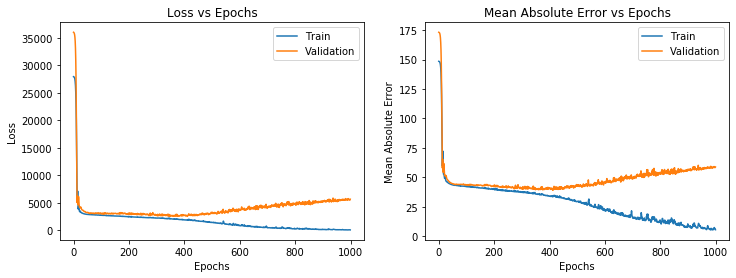

In [34]:
fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()